good

In [576]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
from PIL import Image
import PIL.ImageOps 

def show(im):
    plt.axis('off')
    plt.imshow(im)

name_img = "piece"
i_img = "PNG"
pixel_border = 5

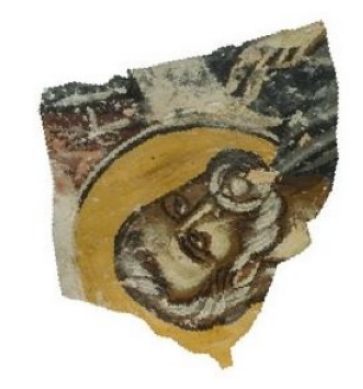

In [577]:
sample_image = cv2.imread(f"../images/_original/{name_img}.{i_img}")
#sample_image = cv2.imread("figures.jpg")
#sample_image = cv2.imread("images/_original/pieces2.PNG")
#sample_image = cv2.imread("stones.jpg")

img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

show(img)

### Image Segmentation using Color Masking

In [578]:
'''
low = np.array([0, 0, 0])
high = np.array([215, 51, 51])

mask = cv2.inRange(img, low, high)

plt.axis('off')
plt.imshow(mask)
'''

"\nlow = np.array([0, 0, 0])\nhigh = np.array([215, 51, 51])\n\nmask = cv2.inRange(img, low, high)\n\nplt.axis('off')\nplt.imshow(mask)\n"

In [579]:
#result = cv2.bitwise_and(img, img, mask=mask)
#show(result)



### Image Segmentation using Otsu Thresholding

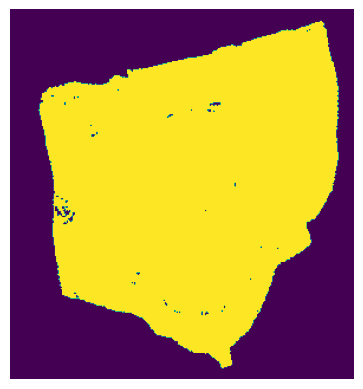

In [580]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

show(img_otsu)

True

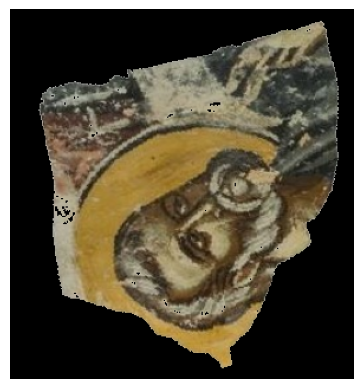

In [581]:
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filteredd = filter_image(img, img_otsu)

show(filteredd)

cv2.imwrite(f'../images/_black_fon/{name_img}_black_fon.jpg', filteredd)

### Маска исходной изобр - все кроме камней

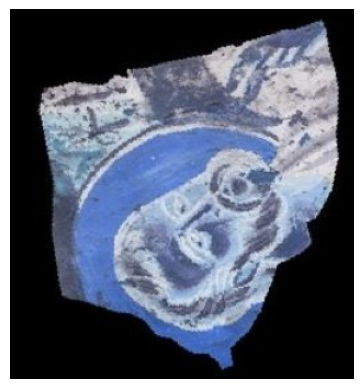

In [582]:
img_neg = cv2.bitwise_not(img)
show(img_neg)

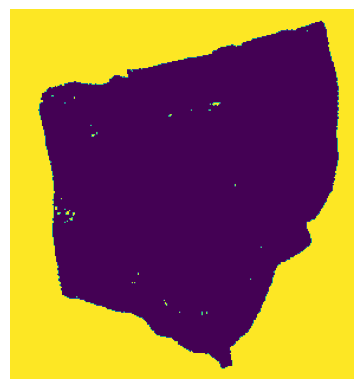

In [583]:
img_gray=cv2.cvtColor(img_neg,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

show(img_otsu)

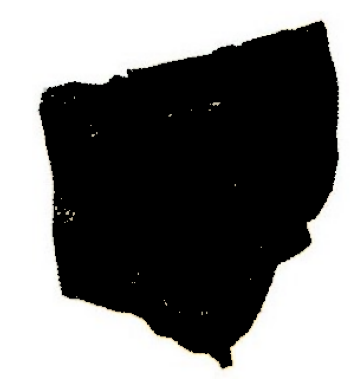

In [584]:
filteredd = filter_image(img, img_otsu)
cv2.imwrite(f'../images/_orig_black/{name_img}_orig_black.jpg', filteredd)

#morph_boars = morph_op(thresh_boars, mode='open', ksize=13)
#!!!!!!!https://habr.com/ru/articles/704546/  хорошая статься как правильно выделить фрагмент

show(filteredd)

маска - контур камней с учетом наращивания границ

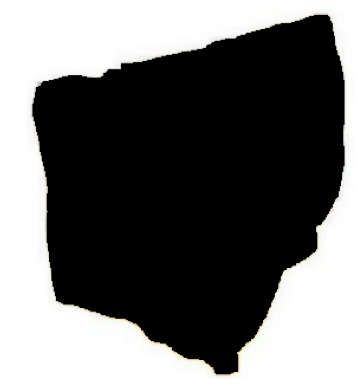

In [585]:
dilated = cv2.erode(filteredd.copy(), None, iterations=pixel_border)
cv2.imwrite(f'../images/_black_ext/{name_img}_black_ext.jpg', dilated)
show(dilated)

True

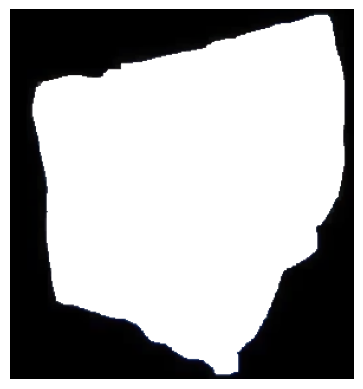

In [586]:
img_neg2 = cv2.bitwise_not(dilated)
show(img_neg2)

cv2.imwrite(f'../images/_neg/{name_img}_neg.jpg', img_neg2)

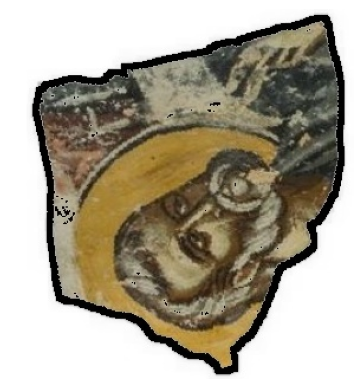

In [587]:
# using PIL

im_rgba = Image.open(f'../images/_black_fon/{name_img}_black_fon.jpg')
im_rgba = Image.fromarray(np.array(im_rgba)[:,:,::-1])
im_a = Image.open(f'../images/_neg/{name_img}_neg.jpg').convert('L').resize(im_rgba.size)

im_rgba.putalpha(im_a)
im_rgba.save(f'../images/_extrapolated/{name_img}_ext.png')

show(im_rgba)

(255, 255, 255, 255)


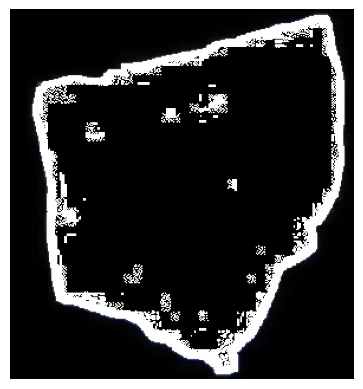

In [588]:
# using PIL
'''
im_rgba = Image.open(f'images/_orig_black/{name_img}_orig_black.jpg')
im_rgba = Image.fromarray(np.array(im_rgba)[:,:,::-1])
im_a = Image.open(f'images/_black_ext/{name_img}_black_ext.jpg').convert('L').resize(im_rgba.size)
'''
im_rgba = Image.open(f'../images/_black_ext/{name_img}_black_ext.jpg')
im_rgba = Image.fromarray(np.array(im_rgba)[:,:,::-1])
im_a = Image.open(f'../images/_orig_black/{name_img}_orig_black.jpg').convert('L').resize(im_rgba.size)

im_rgba.putalpha(im_a)

# прозрачность превращаем в белый цвет
pixdata = im_rgba.load()

print(pixdata[10, 10])

for y in range(im_rgba.size[1]):
    for x in range(im_rgba.size[0]):
        if pixdata[x, y] == (0, 0, 0, 0):
            pixdata[x, y] = (255, 255, 255, 255)

for y in range(im_rgba.size[1]):
    for x in range(im_rgba.size[0]):
        r,g,b,u=im_rgba.getpixel((x,y))
        r=255-r
        g=255-g    # Since 255 is the Highest Index
        b=255-b
        im_rgba.putpixel((x,y),(r,g,b,u))

#inverted_im_rgba = PIL.ImageOps.invert(im_rgba)
#inverted_im_rgba.save(f'images/_mask/{name_img}_mask.png')
im_rgba.save(f'../images/_mask/{name_img}_mask.png')

show(im_rgba)

нарощенная граница

###  Image Segmentation using Contour Detection

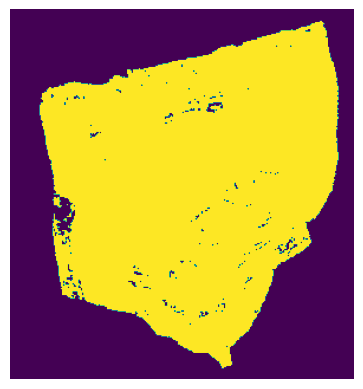

In [589]:
img = cv2.resize(img,(256,256))
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)

_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

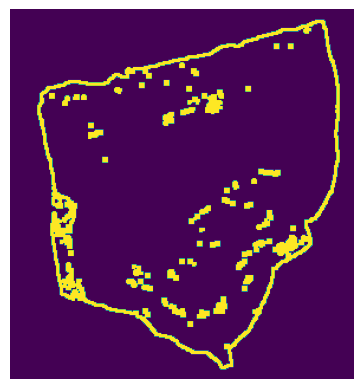

In [590]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

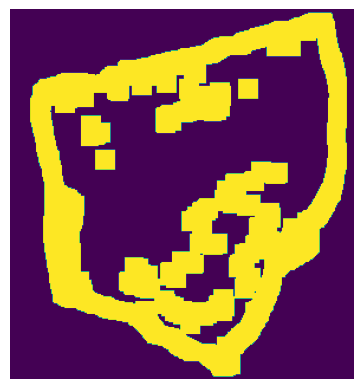

In [591]:
#gray = cv2.cvtColor(thresh,cv2.COLOR_RGB2GRAY)

dilated = cv2.dilate(edges.copy(), None, iterations=6)

plt.axis('off')
plt.imshow(dilated)

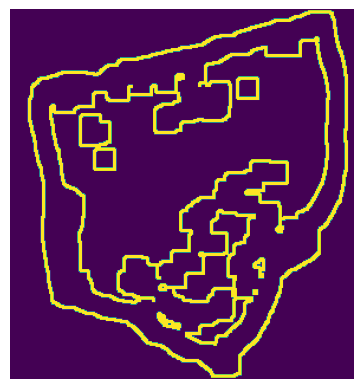

In [592]:
edgess = cv2.dilate(cv2.Canny(dilated,0,255),None)

plt.axis('off')
plt.imshow(edgess)

In [593]:
#_,thresh = cv2.threshold(dilated, np.mean(dilated), 255, cv2.THRESH_BINARY_INV)

#plt.axis('off')
#plt.imshow(thresh)

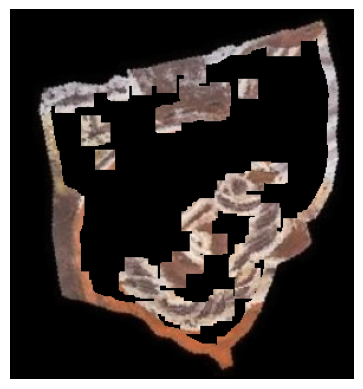

In [594]:
def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, dilated)
#filtered2 = filter_image(filtered, edges)

img = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)#filtered)

### Borders (Хрень)

In [595]:
def gaussian_blur(img, kernel=(3, 3), sigmaX=0, sigmaY=0):
    return cv2.GaussianBlur(img, kernel, sigmaX, sigmaY)

In [596]:
sample_image = cv2.imread("images/_original/stones.jpg")
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

blurred = gaussian_blur(gray, (5, 5))
plt.axis('off')
plt.imshow(blurred)

[ WARN:0@8701.514] global loadsave.cpp:248 findDecoder imread_('images/_original/stones.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [597]:


def canny(image, th1=100, th2=200, apertureSize=3):
    return cv2.Canny(image, threshold1=th1, threshold2=th2, apertureSize=apertureSize)

def detect_white_region(blurred_image, kernel=(3, 3)):

    # Detect white regions
    # next, find regions in the image that are light
    squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel)
    dilated = cv2.dilate(blurred, squareKernel)
    
    edge=canny(dilated)
    
    plt.axis('off')
    plt.imshow(edge)
    
    return edge

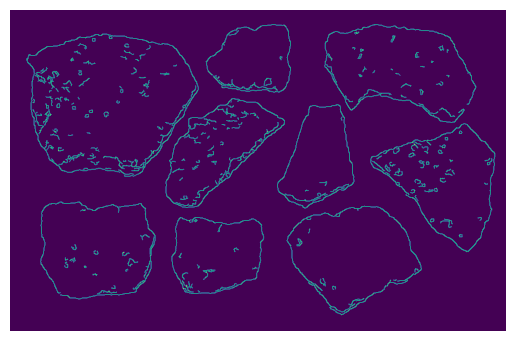

In [598]:
detect_white_region(blurred, (3,3));

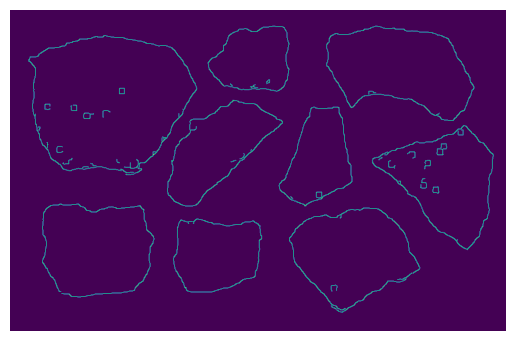

In [599]:
edged=detect_white_region(blurred, (9,9))

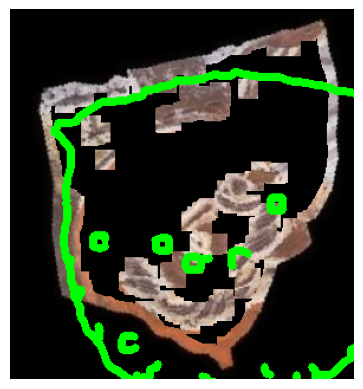

In [600]:
# Detect all contours in Canny-edged image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 6)
plt.axis('off')
plt.imshow(image_with_contours)